# pycisTopic analysis

Full dataset, using SCREEN regions.

In [40]:
import pycisTopic
pycisTopic.__version__

'1.0.2.dev0+g6236cef.d20220816'

In [41]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [42]:
import pickle
import pandas as pd

In [43]:
import glob
from collections import OrderedDict
import numpy as np

In [44]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/full_4_merged


In [45]:
import os
wdir = '/lustre1/project/stg_00090/scatac_benchmark/full_4_merged'
os.chdir( wdir )

In [46]:
n_topics_final = 60
base_topic = 30
topics_final = set(sorted([str(x+1) for x in list(range(base_topic,n_topics_final))]))
n_cores = 36
n_iter = "400"
print(sorted(topics_final))

['31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [47]:
mounts = "/lustre1,/staging,/data,/vsc-hard-mounts,/scratch"
sif = "../0_resources/cistopic_image/20220815_pycistopic.sif"
script = "../0_resources/scripts/runModels_lda_mallet.py"

f_mod_dir = 'models__screen__mallet'
if not os.path.exists(os.path.join(wdir, f_mod_dir)):
    os.makedirs(os.path.join(wdir, f_mod_dir))

infile = 'cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.pkl'
sample = 'master_all_1.FULL'
outfile = sample + '__models_' + str(n_iter) + '_iter.pkl'




topics_todo = str(sorted(list(topics_final))).replace("'","").replace(' ','').replace('[','').replace(']','')
ver=str(n_topics_final)

if not topics_todo == '':
    for n_topics in topics_todo.split(','):
        print(n_topics)
        intermediate_dir = f"{f_mod_dir}/model_intermediates/{sample + '_' + n_topics}_model_intermediates/"
        if not os.path.exists(os.path.join(wdir, intermediate_dir)):
            os.makedirs(os.path.join(wdir, intermediate_dir))
            
        if len(glob.glob(f"{intermediate_dir}/*.pkl")) == 0:
            model_tmp_dir = f"{f_mod_dir}/model_tmp/{sample + '_' + n_topics}_model_tmp/"
            if not os.path.exists(os.path.join(wdir, model_tmp_dir)):
                os.makedirs(os.path.join(wdir, model_tmp_dir))

            out_log = f"{f_mod_dir}/{sample}.models_out_log{n_topics}.txt"
            cmd = f"echo {sample} && cd {wdir} && singularity exec -B {mounts} {sif} python {script} -i {infile} -o {outfile} -nt {n_topics} -c {n_cores} -it {n_iter} -a 50 -abt True -e 0.1 -ebt False -sp {intermediate_dir} -s 555 -td {model_tmp_dir} > {out_log}"

            print(cmd)
            sh_path = f"{f_mod_dir}/{sample}.runmodels{n_topics}.sh"
            with open(sh_path, 'w') as file:
                file.write("#!/bin/sh\n")
                file.write(cmd)
        else:
            print('Already exists')
    else:
        print('All topics done.')


print('\n')

31
Already exists
32
Already exists
33
Already exists
34
Already exists
35
Already exists
36
Already exists
37
Already exists
38
Already exists
39
Already exists
40
Already exists
41
Already exists
42
Already exists
43
Already exists
44
Already exists
45
Already exists
46
Already exists
47
Already exists
48
Already exists
49
Already exists
50
Already exists
51
Already exists
52
Already exists
53
Already exists
54
Already exists
55
Already exists
56
echo master_all_1.FULL && cd /lustre1/project/stg_00090/scatac_benchmark/full_4_merged && singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch ../0_resources/cistopic_image/20220815_pycistopic.sif python ../0_resources/scripts/runModels_lda_mallet.py -i cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.pkl -o master_all_1.FULL__models_400_iter.pkl -nt 56 -c 36 -it 400 -a 50 -abt True -e 0.1 -ebt False -sp models__screen__mallet/model_intermediates/master_all_1.FULL_56_model_intermediates/ -s 555 -td mod

In shell:

In [48]:
for script in models__screen__mallet/*.sh
do
    echo $script
    qsub $script -A lp_symbiosys -l nodes=1:ppn=36 -l walltime=24:00:00 -l pmem=2gb
done

SyntaxError: invalid syntax (2074587295.py, line 1)

In [ ]:
for script in models__screen__mallet/*.sh
do
    echo $script
    sbatch -p --job-name=models --cluster=wice --partition=dedicated_big_bigmem -n 1 -A lp_big_wice_cpu --time=24:00:00 --ntasks=1 --cpus-per-task=36 --mem=900GB $script
done

Then, combine the models:

In [65]:
intermediate_dict = {x.split('/')[-1].split('_model_intermediates')[0]: x for x in sorted(glob.glob(f'{f_mod_dir}/model_intermediates/*/*'))}
intermediate_dict

{'Topic31.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_31_model_intermediates/Topic31.pkl',
 'Topic32.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_32_model_intermediates/Topic32.pkl',
 'Topic33.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_33_model_intermediates/Topic33.pkl',
 'Topic34.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_34_model_intermediates/Topic34.pkl',
 'Topic35.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_35_model_intermediates/Topic35.pkl',
 'Topic36.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_36_model_intermediates/Topic36.pkl',
 'Topic37.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_37_model_intermediates/Topic37.pkl',
 'Topic38.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_38_model_intermediates/Topic38.pkl',
 'Topic39.pkl': 'models__screen__mallet/model_intermediates/master_all_1.FULL_39

In [66]:
file_list = sorted(glob.glob(f'{f_mod_dir}/model_intermediates/*/*'))
n_topics = [int(x.split('Topic')[-1].split('.pkl')[0].replace('Topic','')) for x in file_list]
file_list_sorted = [file_list[x] for x in np.argsort(n_topics)]

models_merged = [pickle.load(open(file, 'rb')) for file in file_list_sorted]

In [67]:
save_path = f"{f_mod_dir}/master_all_1.FULL__models_{n_iter}_iter.pkl"
with open(save_path, "wb") as f:
    pickle.dump(models_merged, f, protocol=4)

In [68]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

In [69]:
cto_path = "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.pkl"

We need to minimize Arun, minimize Cao & Juan, maximize Mimno & maximize log likelihood

In [70]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

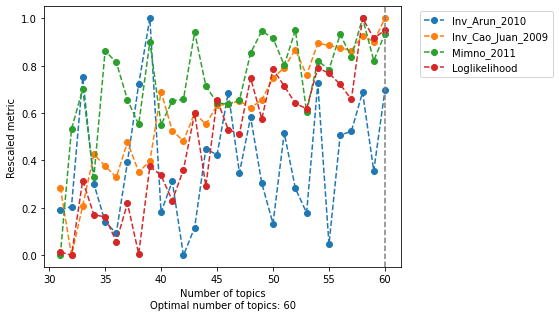

In [72]:
n_topics_chosen = 60
model = evaluate_models(models_merged,
     select_model=n_topics_chosen,
     return_model=True, 
     metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
     plot=True, # disabled since we only test one model here
     plot_metrics=False,
     save=f"plots_qc/master_all_1.FULL__model_evaluation.png"
     )

In [73]:
cto_path_new = cto_path.replace('.pkl',f'.model_{str(n_topics_chosen)}topics.pkl')
with open(cto_path, 'rb') as f:
    cto = pickle.load(f)

cto.add_LDA_model(model)

with open(cto_path_new, "wb") as f:
    pickle.dump(cto, f, protocol=4)

In [63]:
cto.cell_data

,cisTopic_nr_acc,cisTopic_log_nr_acc,cisTopic_nr_frag,cisTopic_log_nr_frag,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,FRIP,TSS_enrichment,sample_id,barcode,Doublet_scores_fragments,Predicted_doublets_fragments,fmx_droplet_type,fmx_sample
CTAGGGCACCCTCGTT___VIB_10xv2_1.FULL,11509,4.061038,15623,4.193764,4.507707,4.253265,32189,17917,14272,0.443381,22163,12329,0.688117,31.995437,VIB_10xv2_1.FULL,CTAGGGCACCCTCGTT,0.114374,False,SNG,sampleA
CAGGCGACTCTAACGT___VIB_10xv2_1.FULL,13497,4.130237,19292,4.285377,4.556821,4.352646,36043,22524,13519,0.375080,25150,15738,0.698721,27.731114,VIB_10xv2_1.FULL,CAGGCGACTCTAACGT,0.098526,False,SNG,sampleA
TACATTCACTGGCAAG___VIB_10xv2_1.FULL,12411,4.093807,15494,4.190164,4.457942,4.253362,28704,17921,10783,0.375662,19201,12026,0.671056,23.990970,VIB_10xv2_1.FULL,TACATTCACTGGCAAG,0.094262,False,SNG,sampleA
CGATACCCTAGCAGGT___VIB_10xv2_1.FULL,15490,4.190051,23541,4.371825,4.702921,4.436544,50457,27324,23133,0.458470,34414,18740,0.685844,27.061606,VIB_10xv2_1.FULL,CGATACCCTAGCAGGT,0.060897,False,SNG,sampleA
CACTTAGGACAGACCC___VIB_10xv2_1.FULL,14560,4.163161,21634,4.335137,4.620511,4.385159,41736,24275,17461,0.418368,31023,18103,0.745747,35.334338,VIB_10xv2_1.FULL,CACTTAGGACAGACCC,0.143631,False,SNG,sampleA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCGAAGGCTGCTGTCCTAG-1___VIB_hydrop_2.FULL,573,2.758155,774,2.888741,3.402949,3.255755,2529,1802,727,0.287465,200,143,0.079356,3.665000,VIB_hydrop_2.FULL,ACCGAAGGCTGCTGTCCTAG-1,0.10107,False,NaN,NaN
CCTCCATAAGCTGTAATCCA_CCTCCATAAGGGACCGATTC-2___VIB_hydrop_2.FULL,739,2.868644,1500,3.176091,3.936564,3.318481,8641,2082,6559,0.759056,2697,711,0.341499,1.720000,VIB_hydrop_2.FULL,CCTCCATAAGCTGTAATCCA_CCTCCATAAGGGACCGATTC-2,0.01533,False,NaN,NaN
GGTTAACCTGTGGAAGGAGA-1___VIB_hydrop_2.FULL,646,2.810233,722,2.858537,3.760347,3.308564,5759,2035,3724,0.646640,317,134,0.065848,3.075000,VIB_hydrop_2.FULL,GGTTAACCTGTGGAAGGAGA-1,0.02233,False,NaN,NaN
CGTGAATGAAAGGACGACAG-1___VIB_hydrop_2.FULL,789,2.897077,1394,3.144263,4.015192,3.237544,10356,1728,8628,0.833140,3179,618,0.357639,2.305000,VIB_hydrop_2.FULL,CGTGAATGAAAGGACGACAG-1,0.010037,False,NaN,NaN
